In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

dataset :- https://www.kaggle.com/datasets/shivavashishtha/2022-ipl-auction-dataset

In [2]:
df=pd.read_csv("ipl_2022_dataset.csv")

In [3]:
df.shape

(633, 8)

In [4]:
df.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [5]:
#Unnamed column is not needed, so we drop it 
df=df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


### Renaming the columns

In [7]:
df.columns=['Player', 'Base_price', 'Type', 'INR_Cost','USD_Cost', 'Prev_team', 'Team']

### Finding & Correcting columns with null values

In [8]:
features=df.columns
features_with_null=[i for i in features if df[i].isnull().sum()!=0]
features_with_null

['INR_Cost', 'USD_Cost', 'Prev_team']

In [9]:
df['INR_Cost']=df['INR_Cost'].fillna(0)
df['USD_Cost']=df['USD_Cost'].fillna(0)
df['Prev_team']=df['Prev_team'].fillna('DNP')

In [10]:
df['Team'].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [11]:
#Making a new column to manipulate sold and unsold players
df['Status']=np.where(df['Team']!='Unsold', 'Sold', 'Unsold')

In [12]:
df[df['Player'].duplicated(keep=False)]

,Player,Base_price,Type,INR_Cost,USD_Cost,Prev_team,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,DNP,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,DNP,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,DNP,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,DNP,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,DNP,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,DNP,Unsold,Unsold


In [13]:
#Number of players that participated in the auction
df.shape[0]

633

In [14]:
mn=df.groupby('Type')['Player'].count()
labels=mn.keys()
vals=mn.values

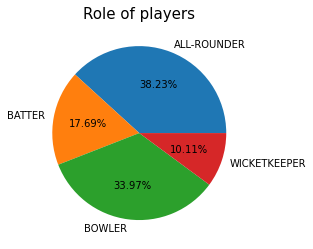

In [15]:
plt.pie(x=vals, labels=labels, autopct='%1.2f%%')
plt.title("Role of players", fontsize=15)
plt.show()

In [16]:
vals=df.groupby('Status')['Player'].count().values
labs=df.groupby('Status')['Player'].count().keys()

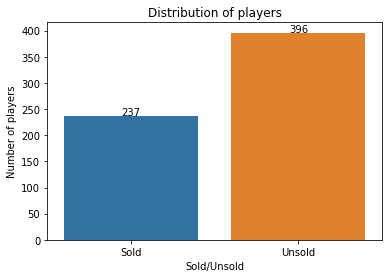

In [17]:
fig=sns.countplot(df['Status'])
plt.ylabel("Number of players")
plt.xlabel("Sold/Unsold")
plt.title("Distribution of players")

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', 
                        xytext=(0,4), textcoords='offset points')

In [18]:
df.groupby('Team')['Player'].count()

Team
Chennai Super Kings             25
Delhi Capitals                  24
Gujarat Titans                  22
Kolkata Knight Riders           25
Lucknow Super Giants            22
Mumbai Indians                  25
Punjab Kings                    25
Rajasthan Royals                24
Royal Challengers Bangalore     22
Sunrisers Hyderabad             23
Unsold                         396
Name: Player, dtype: int64

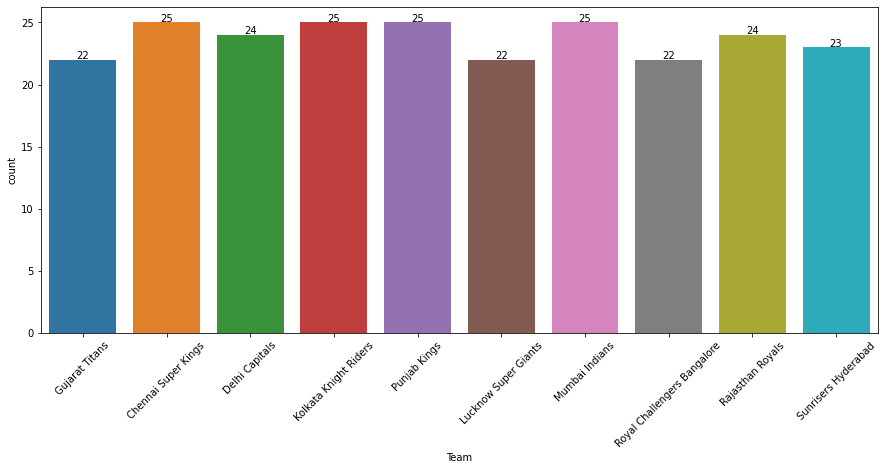

In [19]:
plt.figure(figsize=(15,6))
fig=sns.countplot(df[df['Team']!='Unsold']['Team'])
plt.xticks(rotation=45)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', 
                        xytext=(0,4), textcoords='offset points')

plt.show()

### Manipulating Base_Price

In [20]:
df['Base_price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [21]:
#Making a new column Retention to classify the player selection type
df['Retention']=df['Base_price']

In [22]:
df['Retention']=df['Retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh','50 Lakh', '30 Lakh', '1.5 Cr'], 'Auction')

In [23]:
df['Base_price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [24]:
#Replacing draft pick players to be at 0 Base Price 
df['Base_price']=np.where(df['Base_price']=='Draft Pick',0,df['Base_price'])

In [25]:
df['Base_price'].unique()

array([0, '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', '50 Lakh',
       '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [26]:
#Splitting Base_price into 2 columns one having the numeral and the other having the currency
df['Base_P']=df['Base_price'].copy()
df['Base_Price']=df['Base_P'].apply(lambda x:str(x).split(" ")[0])
df['Base_Price_curr']=df['Base_P'].apply(lambda x:str(x).split(" ")[-1])

In [27]:
#Drop unncessary series
df=df.drop(['Base_price', 'Base_P'], axis=1)

In [28]:
#Replacing retained players to have 0 base price
df['Base_Price']=df['Base_Price'].replace('Retained','0')

In [29]:
df['Retention'].unique()

array(['Draft Pick', 'Auction', 'Retained'], dtype=object)

In [30]:
#Base_price now contains only numerals but the datatype is an 'Object"'. Convert that to float
df['Base_Price'].unique()

array(['0', '2', '40', '20', '1', '75', '50', '30', '1.5'], dtype=object)

In [31]:
df['Base_Price'] = df['Base_Price'].astype(float)
df

,Player,Type,INR_Cost,USD_Cost,Prev_team,Team,Status,Retention,Base_Price,Base_Price_curr
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0.0,0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0.0,0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,Auction,2.0,Cr
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,Auction,40.0,Lakh
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0.0,0
...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,BATTER,0.0,0.0,DNP,Unsold,Unsold,Auction,20.0,Lakh
629,Monu Singh,BOWLER,0.0,0.0,DNP,Unsold,Unsold,Auction,20.0,Lakh
630,Nivethan Radhakrishnan,BOWLER,0.0,0.0,DNP,Unsold,Unsold,Auction,20.0,Lakh
631,Lance Morris,BOWLER,0.0,0.0,DNP,Unsold,Unsold,Auction,20.0,Lakh


In [32]:
#All the teams except unsold
df.groupby(['Team', 'Retention'])['Retention'].count()[:-1]

Team                         Retention 
Chennai Super Kings          Auction       21
                             Retained       4
Delhi Capitals               Auction       20
                             Retained       4
Gujarat Titans               Auction       19
                             Draft Pick     3
Kolkata Knight Riders        Auction       21
                             Retained       4
Lucknow Super Giants         Auction       19
                             Draft Pick     3
Mumbai Indians               Auction       21
                             Retained       4
Punjab Kings                 Auction       23
                             Retained       2
Rajasthan Royals             Auction       21
                             Retained       3
Royal Challengers Bangalore  Auction       19
                             Retained       3
Sunrisers Hyderabad          Auction       20
                             Retained       3
Name: Retention, dtype: int64

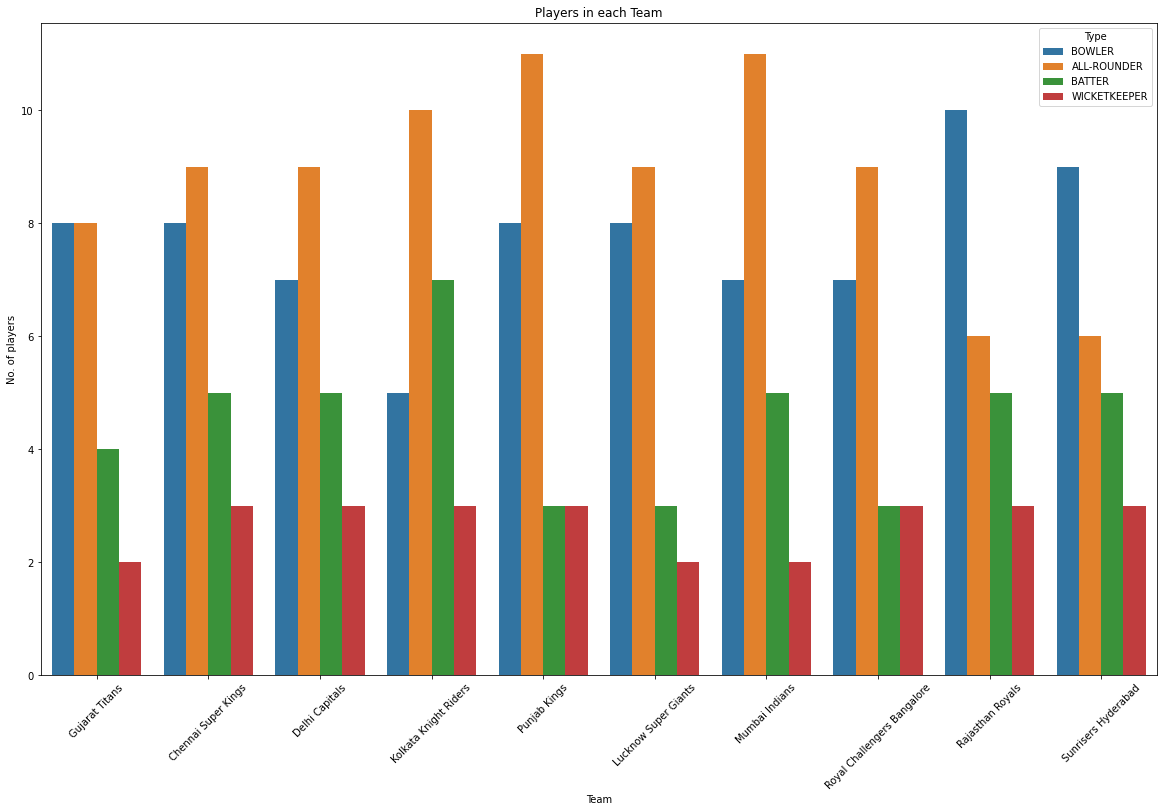

In [33]:
plt.figure(figsize=(20,12))
fig=sns.countplot(df[df['Team']!='Unsold']['Team'], hue=df['Type'])
plt.title("Players in each Team")
plt.ylabel("No. of players")
plt.xticks(rotation=45)
plt.show()

In [34]:
#Highest amounts spent by each team
df.loc[(df['Retention']=='Auction') & (df['Team']!='Unsold')].groupby('Team')['Player','INR_Cost'].max()

,Player,INR_Cost
Team,,
Chennai Super Kings,Tushar Deshpande,14.00
Delhi Capitals,Yash Dhull,10.75
Gujarat Titans,Yash Dayal,10.00
Kolkata Knight Riders,Umesh Yadav,12.25
Lucknow Super Giants,Shahbaz Nadeem,10.00
Mumbai Indians,Tymal Mills,15.25
Punjab Kings,Writtick Chatterjee,11.50
Rajasthan Royals,Yuzvendra Chahal,10.00
Royal Challengers Bangalore,Wanindu Hasaranga,10.75


#Player retained at max price
df.loc[(df['Retention']=='Retained')].groupby('Team')['Player','INR_Cost'].max()

In [35]:
#Player retained at highest price
#There can be multiple players here
df[df['Retention']=='Retained'].sort_values(by='INR_Cost', ascending=False).head(5)

,Player,Type,INR_Cost,USD_Cost,Prev_team,Team,Status,Retention,Base_Price,Base_Price_curr
22,Ravindra Jadeja,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,0.0,Retained
47,Rishabh Pant,WICKETKEEPER,16.0,2080.0,DC,Delhi Capitals,Sold,Retained,0.0,Retained
143,Rohit Sharma,BATTER,16.0,2080.0,MI,Mumbai Indians,Sold,Retained,0.0,Retained
168,Virat Kohli,BATTER,15.0,1950.0,RCB,Royal Challengers Bangalore,Sold,Retained,0.0,Retained
214,Kane Williamson,BATTER,14.0,1820.0,SRH,Sunrisers Hyderabad,Sold,Retained,0.0,Retained


In [36]:
#Top 5 bowlers
df[(df['Retention']=='Auction') & (df['Type']=='BOWLER')].sort_values(by='INR_Cost', ascending=False).head(5)

,Player,Type,INR_Cost,USD_Cost,Prev_team,Team,Status,Retention,Base_Price,Base_Price_curr
23,Deepak Chahar,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,Auction,2.0,Cr
48,Shardul Thakur,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,Auction,2.0,Cr
192,Prasidh Krishna,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,Auction,1.0,Cr
2,Lockie Ferguson,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,Auction,2.0,Cr
122,Avesh Khan,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,Auction,20.0,Lakh


In [37]:
#Top 5 batsmen
df[(df['Retention']=='Auction') & (df['Type']=='BATTER')].sort_values(by='INR_Cost', ascending=False).head(5)

,Player,Type,INR_Cost,USD_Cost,Prev_team,Team,Status,Retention,Base_Price,Base_Price_curr
71,Shreyas Iyer,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,Auction,2.0,Cr
193,Shimron Hetmyer,BATTER,8.50,1105.0,DC,Rajasthan Royals,Sold,Auction,1.5,Cr
217,Rahul Tripathi,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,Sold,Auction,40.0,Lakh
100,Shikhar Dhawan,BATTER,8.25,1072.5,DC,Punjab Kings,Sold,Auction,2.0,Cr
195,Devdutt Padikkal,BATTER,7.75,1007.5,RCB,Rajasthan Royals,Sold,Auction,2.0,Cr


In [39]:
df['Team'].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [40]:
df['Prev_team'].unique()

array(['SRH', 'MI', 'KKR', 'RR', 'PBKS', 'DNP', 'CSK', 'DC', 'RCB'],
      dtype=object)

In [48]:
unsold_players=df[(df['Team']=='Unsold') & (df['Prev_team']!='DNP')][['Player', 'Prev_team']]
unsold_players

,Player,Prev_team
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB
